In [2]:
import copernicusmarine as cm

In [3]:
cm.subset(
  dataset_id="c3s_obs-sl_glo_phy-ssh_my_twosat-l4-duacs-0.25deg_P1D",
  dataset_version="202112",
  variables=["adt"],
  minimum_longitude=-101.0,
  maximum_longitude=-50.0,
  minimum_latitude=14.0,
  maximum_latitude=54.0,
  start_datetime="2018-06-07T00:00:00",
  end_datetime="2023-06-07T00:00:00",
  output_filename = "data_copernicus_adt_2018_2023.nc",
)

username:

  croman1


password:

  ········


INFO - 2024-04-04T22:32:59Z - You forced selection of dataset version "202112"
INFO - 2024-04-04T22:32:59Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-04-04T22:33:04Z - Service was not specified, the default one was selected: "arco-time-series"
INFO - 2024-04-04T22:33:07Z - Downloading using service arco-time-series...
INFO - 2024-04-04T22:33:11Z - <xarray.Dataset>
Dimensions:    (time: 1827, latitude: 160, longitude: 204)
Coordinates:
  * latitude   (latitude) float32 14.12 14.38 14.62 14.88 ... 53.38 53.62 53.88
  * longitude  (longitude) float32 -100.9 -100.6 -100.4 ... -50.62 -50.38 -50.12
  * time       (time) datetime64[ns] 2018-06-07 2018-06-08 ... 2023-06-07
Data variables:
    adt        (time, latitude, longitude) float64 dask.array<chunksize=(1827, 16, 8), meta=np.ndarray>
Attributes: (12/45)
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:               

  Y


INFO - 2024-04-04T22:33:15Z - Writing to local storage. Please wait...


  0%|          | 0/2822 [00:00<?, ?it/s]

INFO - 2024-04-04T22:33:41Z - Successfully downloaded to data_copernicus_adt_2018_2023_(1).nc


WindowsPath('data_copernicus_adt_2018_2023_(1).nc')

In [4]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

In [5]:
import netCDF4
import datetime
import numpy as np
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
import xarray as xr
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [6]:
dataset = 'data_copernicus_adt_2018_2023.nc'
ds = xr.open_dataset(dataset)
ds

<xarray.Dataset>
Dimensions:    (time: 1827, latitude: 160, longitude: 204)
Coordinates:
  * latitude   (latitude) float32 14.12 14.38 14.62 14.88 ... 53.38 53.62 53.88
  * longitude  (longitude) float32 -100.9 -100.6 -100.4 ... -50.62 -50.38 -50.12
  * time       (time) datetime64[ns] 2018-06-07 2018-06-08 ... 2023-06-07
Data variables:
    adt        (time, latitude, longitude) float64 ...
Attributes: (12/45)
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Grid
    comment:                         Sea Surface Height measured by Altimetry...
    contact:                         http://climate.copernicus.eu/c3s-user-se...
    creator_email:                   http://climate.copernicus.eu/c3s-user-se...
    ...                              ...
    time_coverage_duration:          P1D
    time_coverage_end:               1993-01-01T12:00:00Z
    time_coverage_resolution:        P1D
    time_coverage_start:             1992-12-31T12:00:00Z
    title:                           DT merged two satellites Global Ocean Gr...
    copernicusmarine_version:        1.0.10

# Time series

In [7]:
samples_lat = [34, 36, 38, 40, 42] #, 40, 42, 44]
samples_lon = [-70, -68, -66, -64] #, -64, -62, -60]

samples_lat = [36, 38, 42] #, 40, 42, 44]
samples_lon = [-70, -68, -66] #, -64, -62, -60]

mesh1 = np.array(np.meshgrid(samples_lat, samples_lon)).T.reshape(-1,2)
mesh1.shape

(9, 2)

In [8]:
samples_lat = [18, 20, 22, 24, 26] #, 40, 42, 44]
samples_lon = [-94, -92, -90, -88] #, -64, -62, -60]

mesh2 = np.array(np.meshgrid(samples_lat, samples_lon)).T.reshape(-1,2)
mesh2.shape

(20, 2)

Text(0.5, 1.0, 'Raw time series')

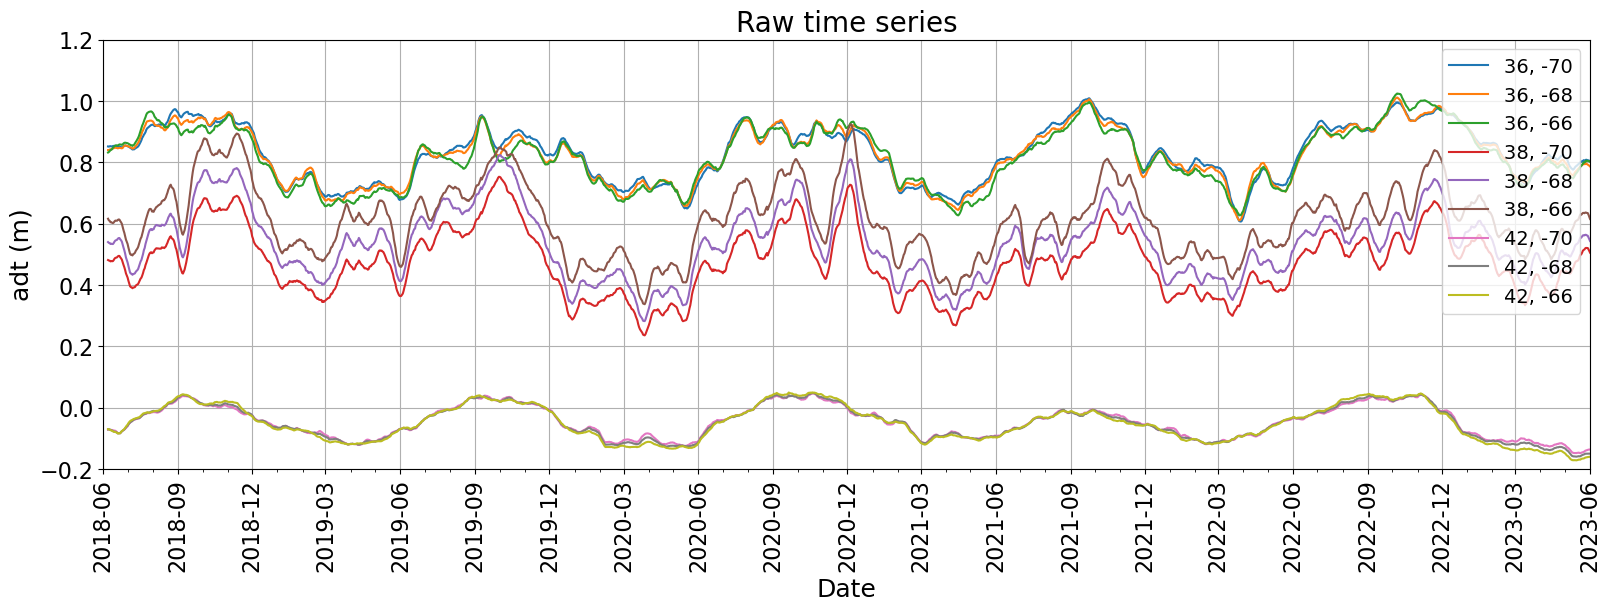

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(16, 6), layout='constrained')

for i in range(9):
    mm = ds['adt'].where(
        (ds.latitude >= mesh1[i][0]) & (ds.latitude < mesh1[i][0] + 2) &
        (ds.longitude >= mesh1[i][1]) & (ds.longitude < mesh1[i][0] + 2),
        drop = True
    )
    # ax.text(mm.time[0].values, mm.mean(['latitude', 'longitude'])[0].values, mesh1[i][0], horizontalalignment='right')
    ax.plot(mm.time, mm.mean(['latitude', 'longitude']), label=f"{mesh1[i][0]}, {mesh1[i][1]}")

ax.xaxis.set_major_locator(MonthLocator(bymonth=(3, 6, 9, 12)))
ax.xaxis.set_minor_locator(MonthLocator())

ax.grid()
ax.legend(fontsize=14, loc="upper right")

plt.xlim([17683, 19509])
plt.xticks(fontsize=16, rotation=90)
plt.xlabel('Date', fontsize=18)
plt.ylim([-0.2, 1.2])
plt.yticks(fontsize=16, rotation=0)
plt.ylabel('adt (m)', fontsize=18)
plt.title('Raw time series', fontsize=20)

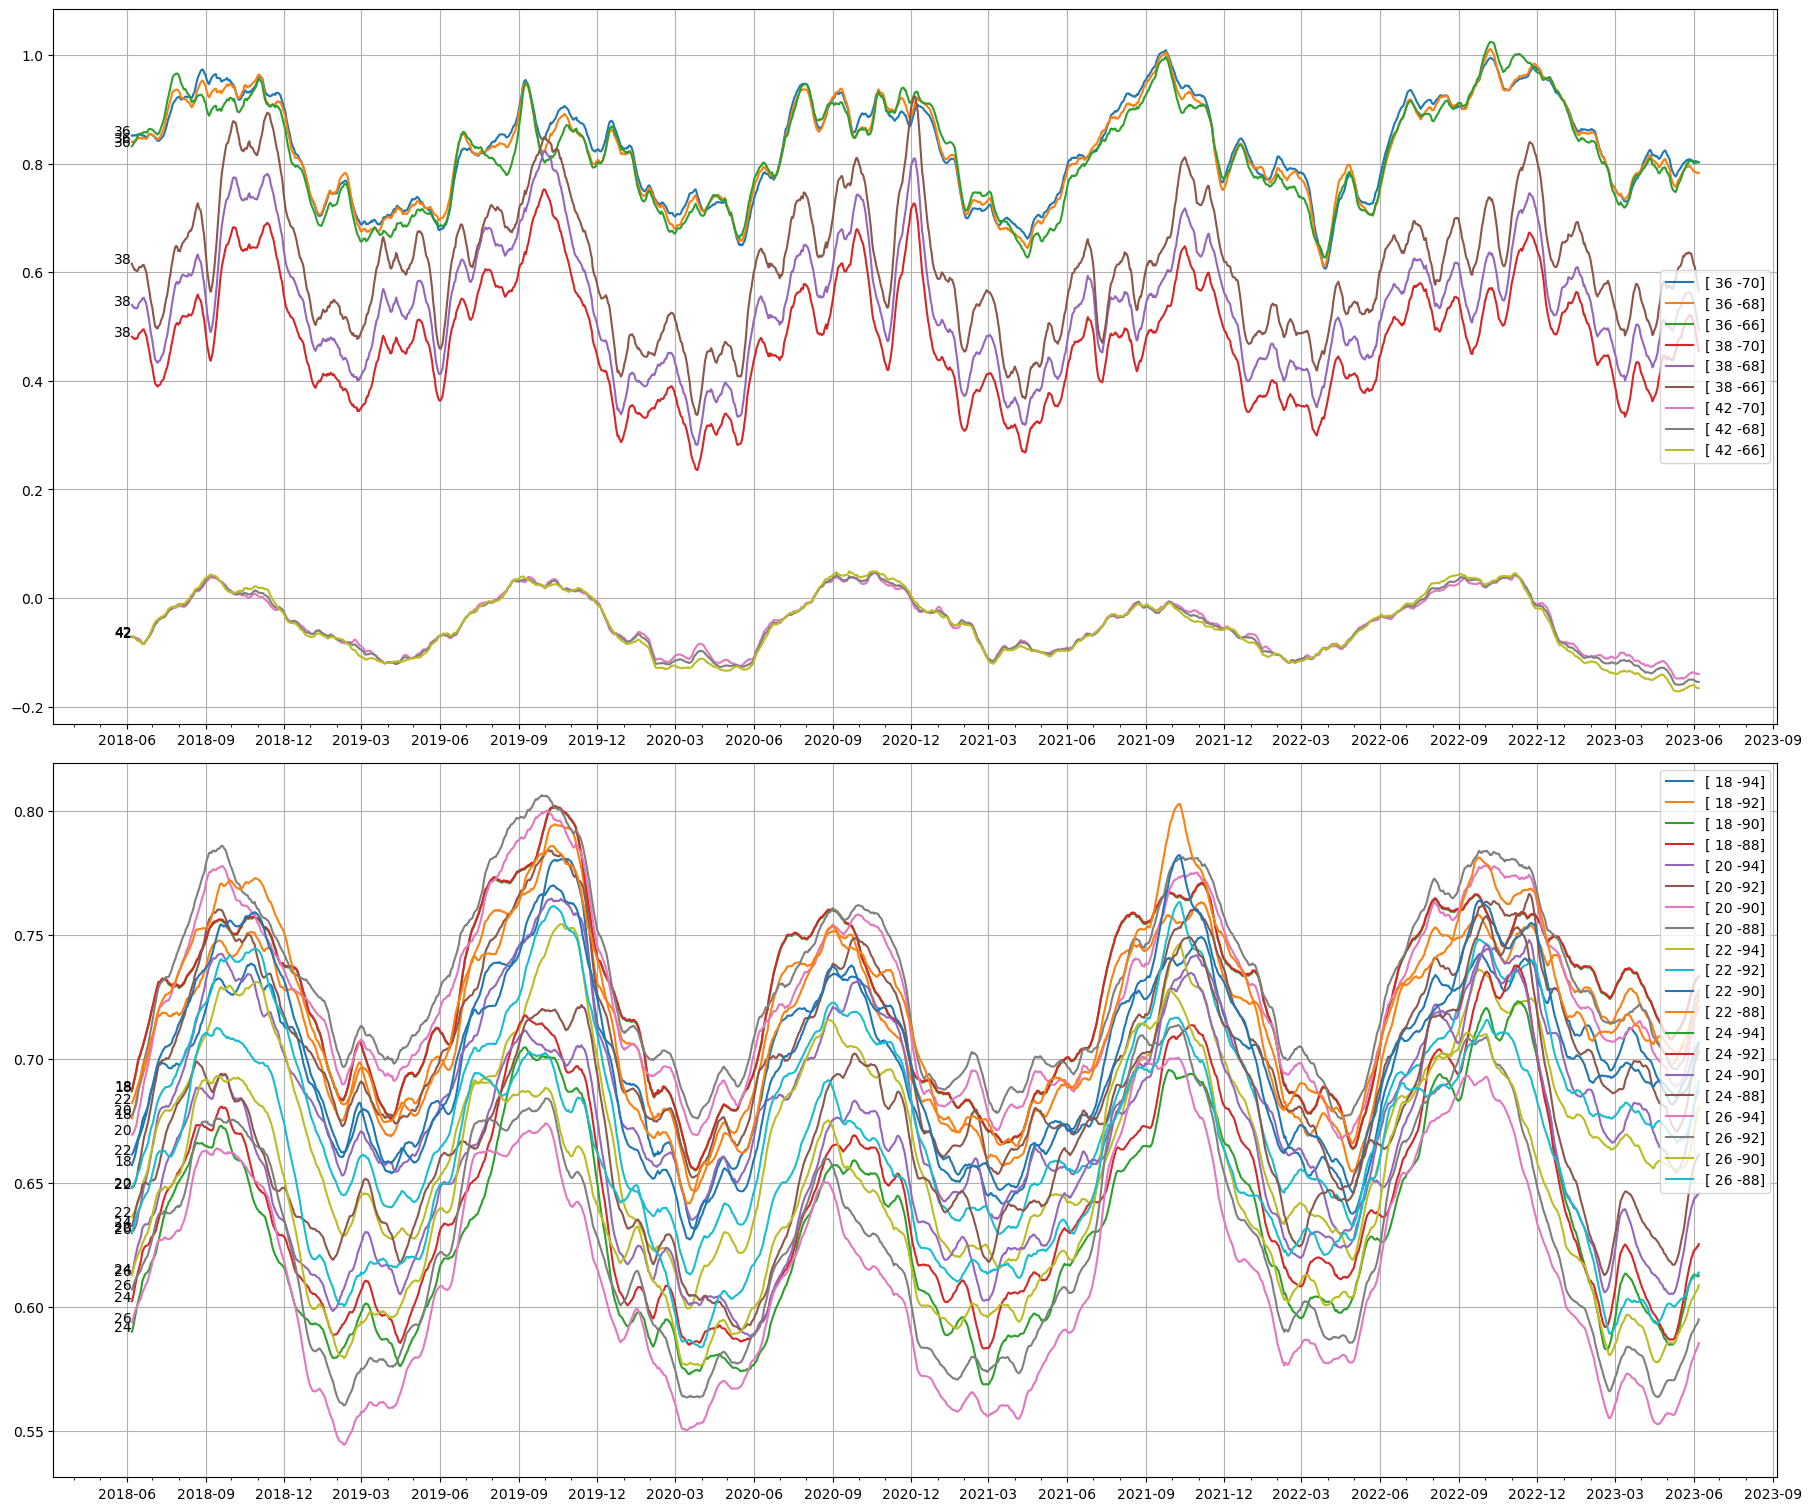

In [10]:
fig, axs = plt.subplots(2, 1, figsize=(18, 15), layout='constrained')
ax = axs[0]

for i in range(9):
    mm = ds['adt'].where(
        (ds.latitude >= mesh1[i][0]) & (ds.latitude < mesh1[i][0] + 2) &
        (ds.longitude >= mesh1[i][1]) & (ds.longitude < mesh1[i][0] + 2),
        drop = True
    )
    ax.text(mm.time[0].values, mm.mean(['latitude', 'longitude'])[0].values, mesh1[i][0], horizontalalignment='right')
    ax.plot(mm.time, mm.mean(['latitude', 'longitude']), label=mesh1[i])
    ax.xaxis.set_major_locator(MonthLocator(bymonth=(3, 6, 9, 12)))
    ax.xaxis.set_minor_locator(MonthLocator())
ax.grid()
ax.legend()

ax = axs[1]

for i in range(20):
    mm = ds['adt'].where(
        (ds.latitude >= mesh2[i][0]) & (ds.latitude < mesh2[i][0] + 2) &
        (ds.longitude >= mesh2[i][1]) & (ds.longitude < mesh2[i][0] + 2),
        drop = True
    )
    ax.text(mm.time[0].values, mm.mean(['latitude', 'longitude'])[0].values, mesh2[i][0], horizontalalignment='right')
    ax.plot(mm.time, mm.mean(['latitude', 'longitude']), label=mesh2[i])
    ax.xaxis.set_major_locator(MonthLocator(bymonth=(3, 6, 9, 12)))
    ax.xaxis.set_minor_locator(MonthLocator())
ax.grid()
ax.legend()

# Statistical analysis

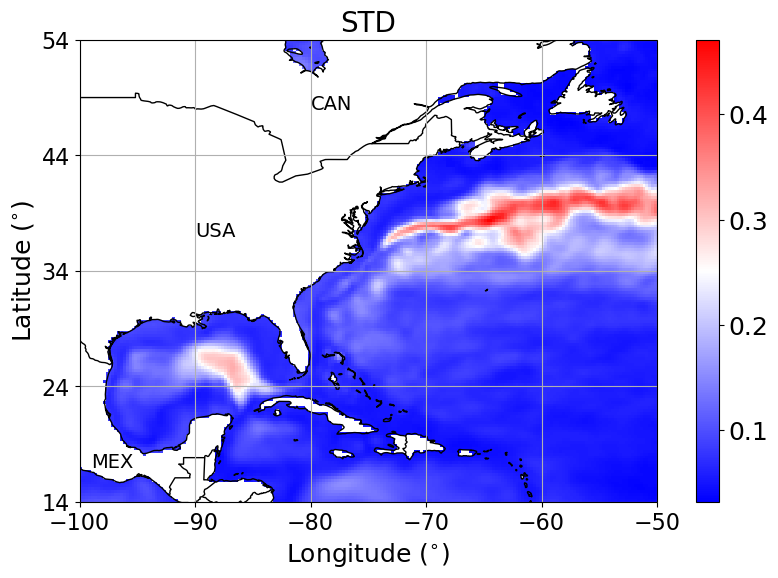

In [11]:
plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cfeature.BORDERS)  # Add country borders for better referenc

plt.pcolormesh(ds.longitude, ds.latitude, ds.std(['time'])['adt'], transform=ccrs.PlateCarree(), cmap=plt.cm.bwr)
plt.xlim([-100, -50])
plt.xticks([-100, -90, -80, -70, -60, -50], fontsize=16)
plt.xlabel(r'Longitude $(^{\circ}$)', fontsize=18)
plt.ylim([14, 54])
plt.yticks([14, 24, 34, 44, 54], fontsize=16)
plt.ylabel(r'Latitude $(^{\circ}$)', fontsize=18)
plt.title('STD', fontsize=20)
cbar = plt.colorbar(ticks=[0, 0.1, 0.2, 0.3, 0.4, 0.5])
cbar.ax.set_yticklabels([0, 0.1, 0.2, 0.3, 0.4, 0.5], fontsize=18)

plt.text(-80, 48, 'CAN', fontsize=14)
plt.text(-90, 37, 'USA', fontsize=14)
plt.text(-99, 17, 'MEX', fontsize=14)

# plt.savefig("heatmap_adt.png", transparent=True, bbox_inches="tight", facecolor ='w', dpi=700)
plt.grid()
plt.show()

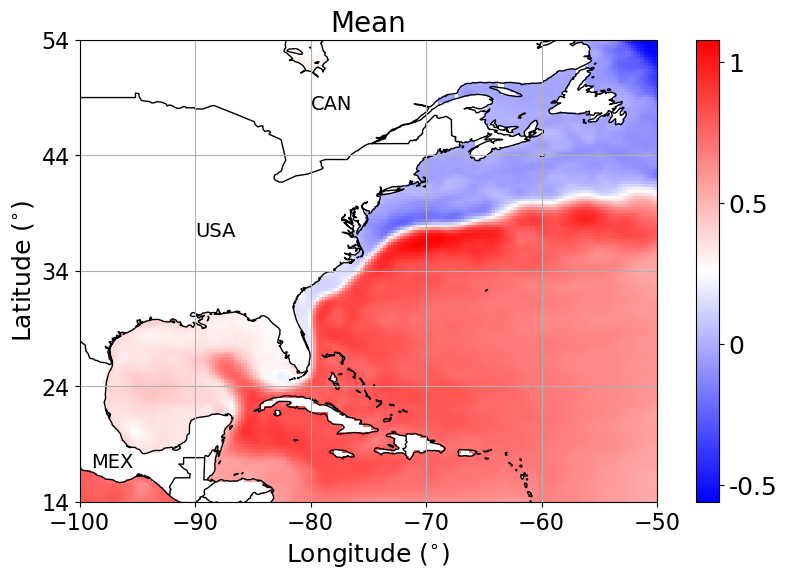

In [12]:
plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cfeature.BORDERS)  # Add country borders for better referenc

plt.pcolormesh(ds.longitude, ds.latitude, ds.mean(['time'])['adt'], transform=ccrs.PlateCarree(), cmap=plt.cm.bwr)
plt.xlim([-100, -50])
plt.xticks([-100, -90, -80, -70, -60, -50], fontsize=16)
plt.xlabel(r'Longitude $(^{\circ}$)', fontsize=18)
plt.ylim([14, 54])
plt.yticks([14, 24, 34, 44, 54], fontsize=16)
plt.ylabel(r'Latitude $(^{\circ}$)', fontsize=18)
plt.title('Mean', fontsize=20)
# cbar = plt.colorbar()
cbar = plt.colorbar(ticks=[-1, -0.5, 0, 0.5, 1])
cbar.ax.set_yticklabels([-1, -0.5, 0, 0.5, 1], fontsize=18)

plt.text(-80, 48, 'CAN', fontsize=14)
plt.text(-90, 37, 'USA', fontsize=14)
plt.text(-99, 17, 'MEX', fontsize=14)

# plt.savefig("heatmap_adt.png", transparent=True, bbox_inches="tight", facecolor ='w', dpi=700)
plt.grid()
plt.show()

In [13]:
mm = ds.where(
    (ds.latitude >= 42) & (ds.latitude < 44) &
    (ds.longitude >= -64) & (ds.longitude < -62),
    drop = True
)
mm

<xarray.Dataset>
Dimensions:    (time: 1827, latitude: 8, longitude: 8)
Coordinates:
  * latitude   (latitude) float32 42.12 42.38 42.62 42.88 ... 43.38 43.62 43.88
  * longitude  (longitude) float32 -63.88 -63.62 -63.38 ... -62.62 -62.38 -62.12
  * time       (time) datetime64[ns] 2018-06-07 2018-06-08 ... 2023-06-07
Data variables:
    adt        (time, latitude, longitude) float64 -0.1022 -0.1046 ... -0.1264
Attributes: (12/45)
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Grid
    comment:                         Sea Surface Height measured by Altimetry...
    contact:                         http://climate.copernicus.eu/c3s-user-se...
    creator_email:                   http://climate.copernicus.eu/c3s-user-se...
    ...                              ...
    time_coverage_duration:          P1D
    time_coverage_end:               1993-01-01T12:00:00Z
    time_coverage_resolution:        P1D
    time_coverage_start:             1992-12-31T12:00:00Z
    title:                           DT merged two satellites Global Ocean Gr...
    copernicusmarine_version:        1.0.10

<Axes: title={'center': 'adt'}, xlabel='time'>

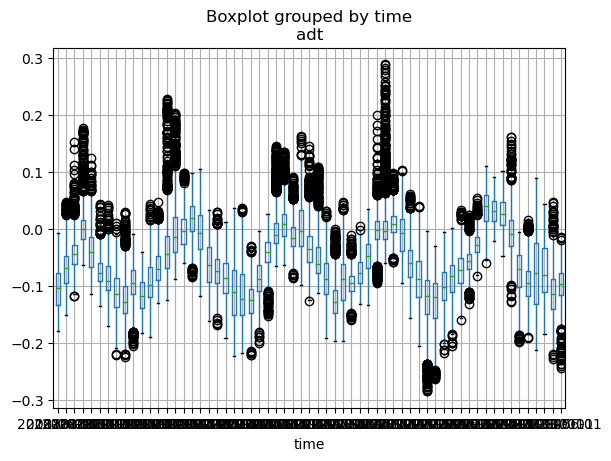

In [14]:
df = mm.to_dataframe()
df.reset_index(inplace=True)
df.time = df.time.apply(lambda s: datetime.date(s.year, s.month, 1))

df.boxplot(column=['adt'], by='time')

Text(0.5, 1.0, 'Seasonal trend')

<Figure size 1600x600 with 0 Axes>

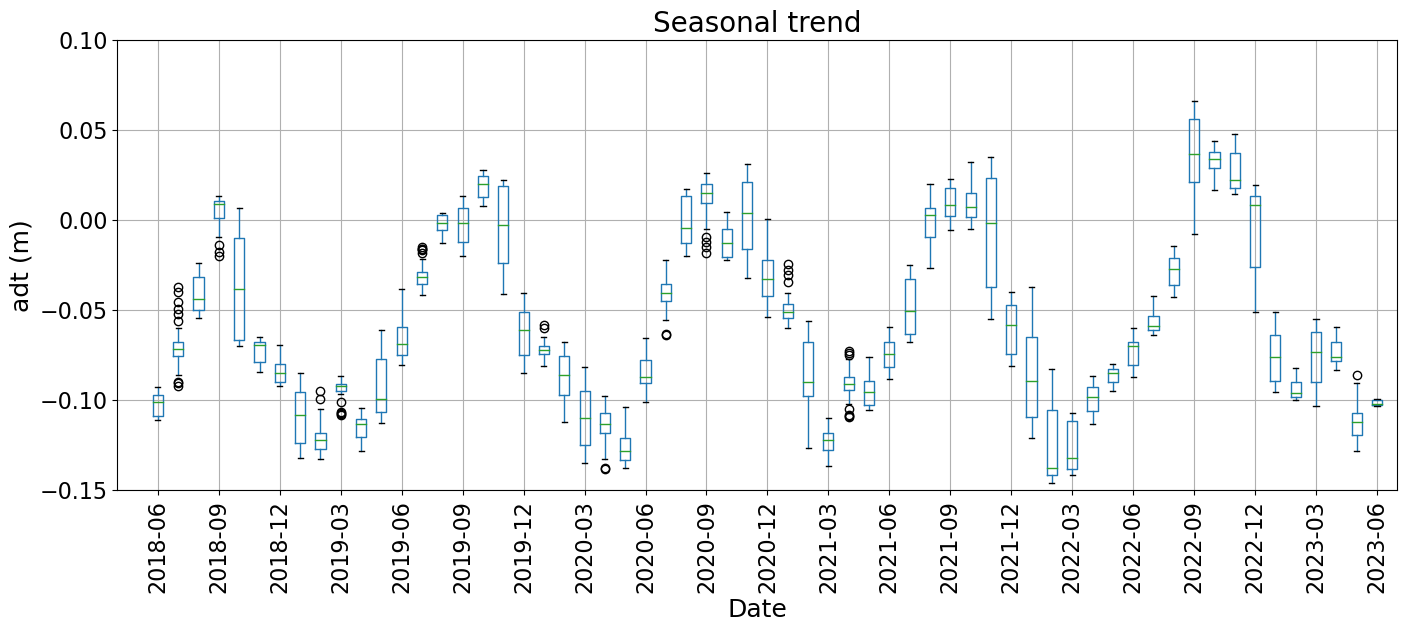

In [15]:
df = mm.mean(['latitude', 'longitude']).to_dataframe()
df.reset_index(inplace=True)
df.time = df.time.apply(lambda s: datetime.date(s.year, s.month, 1))

# fig, ax = plt.subplots()
plt.figure(figsize=(16, 6))
axs = df.boxplot(column=['adt'], by='time', return_type='axes', figsize=(16, 6))

ax=axs[0]
fig = axs[0].get_figure()
fig.suptitle('')
# ax.set_title('ga')

# ax.xaxis.set_major_locator(MonthLocator(bymonth=(3, 6, 9, 12)))
# ax.xaxis.set_minor_locator(MonthLocator())

dates = ['2018-06','2018-09','2018-12','2019-03','2019-06','2019-09',
         '2019-12','2020-03','2020-06','2020-09','2020-12','2021-03',
         '2021-06','2021-09','2021-12','2022-03','2022-06','2022-09',
         '2022-12','2023-03','2023-06']

plt.xlim([-1, 62])
plt.xticks(range(1,64,3), labels=dates, fontsize=16, rotation=90)
plt.xlabel('Date', fontsize=18)
plt.ylim([-0.15, 0.1])
plt.yticks(fontsize=16, rotation=0)
plt.ylabel('adt (m)', fontsize=18)
plt.title('Seasonal trend', fontsize=20)

# Noisy data

In [16]:
from scipy import signal
from scipy.signal import savgol_filter

b, a = signal.butter(3, 0.05)
zi = signal.lfilter_zi(b, a)

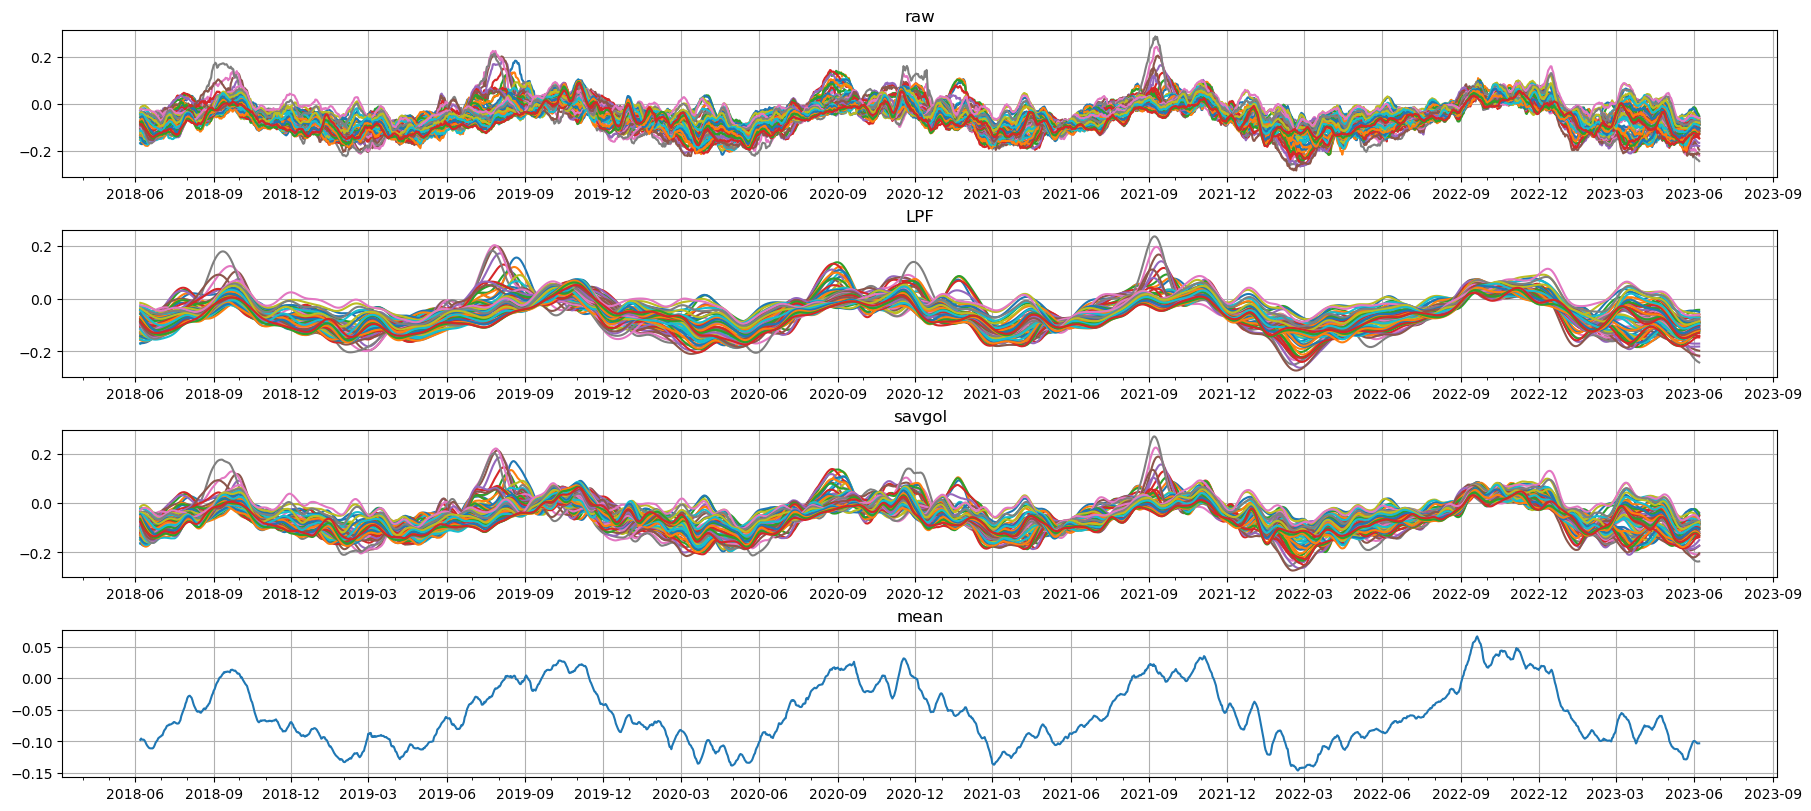

In [17]:
fig, axs = plt.subplots(4, 1, figsize=(18, 8), layout='constrained')
ax = axs[0]

for lat in mm.latitude:
    for lon in mm.longitude:
        ax.plot(mm.time, mm['adt'].sel(latitude=lat, longitude=lon))
ax.xaxis.set_major_locator(MonthLocator(bymonth=(3, 6, 9, 12)))
ax.xaxis.set_minor_locator(MonthLocator())
ax.set_title("raw")
ax.grid()

ax = axs[1]
for lat in mm.latitude:
    for lon in mm.longitude:
        # ax.plot(mm.time, savgol_filter(mm['adt'].sel(latitude=lat, longitude=lon), 30, 3))
        xn = mm['adt'].sel(latitude=lat, longitude=lon).values
        z, _ = signal.lfilter(b, a, xn, zi=zi*xn[0])
        z2, _ = signal.lfilter(b, a, z, zi=zi*z[0])
        y = signal.filtfilt(b, a, xn)
        ax.plot(mm.time, y)
ax.xaxis.set_major_locator(MonthLocator(bymonth=(3, 6, 9, 12)))
ax.xaxis.set_minor_locator(MonthLocator())
ax.set_title("LPF")
ax.grid()

ax = axs[2]
for lat in mm.latitude:
    for lon in mm.longitude:
        xn = savgol_filter(mm['adt'].sel(latitude=lat, longitude=lon), 30, 3)
        ax.plot(mm.time, xn)
        # xn = mm['adt'].sel(latitude=lat, longitude=lon).values
        # z, _ = signal.lfilter(b, a, xn, zi=zi*xn[0])
        # z2, _ = signal.lfilter(b, a, z, zi=zi*z[0])
        # y = signal.filtfilt(b, a, xn)
        # ax.plot(mm.time, y)
ax.xaxis.set_major_locator(MonthLocator(bymonth=(3, 6, 9, 12)))
ax.xaxis.set_minor_locator(MonthLocator())
ax.set_title("savgol")
ax.grid()

ax = axs[3]
ax.plot(mm.time, mm['adt'].mean(['latitude', 'longitude']))
ax.xaxis.set_major_locator(MonthLocator(bymonth=(3, 6, 9, 12)))
ax.xaxis.set_minor_locator(MonthLocator())
ax.set_title("mean")
ax.grid()

# Filtering

In [18]:
def filtering(x):
    return savgol_filter(x, 30, 3)

In [182]:
mm = ds.where(
    (ds.latitude >= 19) & (ds.latitude < 34) &
    (ds.longitude >= -100) & (ds.longitude < -70),
    drop = True
)
mm = ds
mm

<xarray.Dataset>
Dimensions:    (time: 1827, latitude: 160, longitude: 204)
Coordinates:
  * latitude   (latitude) float32 14.12 14.38 14.62 14.88 ... 53.38 53.62 53.88
  * longitude  (longitude) float32 -100.9 -100.6 -100.4 ... -50.62 -50.38 -50.12
  * time       (time) datetime64[ns] 2018-06-07 2018-06-08 ... 2023-06-07
Data variables:
    adt        (time, latitude, longitude) float64 0.8189 0.8184 ... -0.5332
    labels     (latitude, longitude) float64 nan nan nan nan ... 5.0 5.0 5.0 5.0
Attributes: (12/45)
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Grid
    comment:                         Sea Surface Height measured by Altimetry...
    contact:                         http://climate.copernicus.eu/c3s-user-se...
    creator_email:                   http://climate.copernicus.eu/c3s-user-se...
    ...                              ...
    time_coverage_duration:          P1D
    time_coverage_end:               1993-01-01T12:00:00Z
    time_coverage_resolution:        P1D
    time_coverage_start:             1992-12-31T12:00:00Z
    title:                           DT merged two satellites Global Ocean Gr...
    copernicusmarine_version:        1.0.10

In [183]:
labels = np.empty((160, 204))
labels[:] = np.nan
mm['labels'] = (('latitude', 'longitude'), labels)

In [184]:
for i in range(160):
    for j in range(204):
        if (np.isnan(mm['adt'][:, i, j]).sum() == 0):
            mm['adt'][:, i, j] = filtering(mm['adt'][:, i, j]) # np.random.normal(0, 0.1, 1827)

In [185]:
df = mm['adt'].to_dataframe().unstack(level=0)
df.dropna(inplace=True)
df.head()

adt                                              \
time               2018-06-07 2018-06-08 2018-06-09 2018-06-10 2018-06-11   
latitude longitude                                                          
14.125   -100.875    0.819198   0.815945   0.813294   0.811217   0.809685   
         -100.625    0.818592   0.816840   0.815524   0.814623   0.814116   
         -100.375    0.819780   0.819958   0.820332   0.820891   0.821626   
         -100.125    0.821921   0.823922   0.825838   0.827673   0.829432   
         -99.875     0.827892   0.831067   0.833876   0.836344   0.838494   

                                                                           \
time               2018-06-12 2018-06-13 2018-06-14 2018-06-15 2018-06-16   
latitude longitude                                                          
14.125   -100.875    0.808672   0.808148   0.808087   0.808459   0.809236   
         -100.625    0.813982   0.814200   0.814748   0.815606   0.816753   
         -100.375    0.822527   0.823584   0.824786   0.826124   0.827587   
         -100.125    0.831122   0.832746   0.834310   0.835820   0.837280   
         -99.875     0.840348   0.841930   0.843263   0.844369   0.845273   

                    ...                                              \
time                ... 2023-05-29 2023-05-30 2023-05-31 2023-06-01   
latitude longitude  ...                                               
14.125   -100.875   ...   0.765015   0.764769   0.764982   0.765688   
         -100.625   ...   0.752909   0.754794   0.757372   0.760688   
         -100.375   ...   0.749269   0.753530   0.758665   0.764724   
         -100.125   ...   0.754736   0.760774   0.767675   0.775476   
         -99.875    ...   0.765405   0.772222   0.779689   0.787819   

                                                                           \
time               2023-06-02 2023-06-03 2023-06-04 2023-06-05 2023-06-06   
latitude longitude                                                          
14.125   -100.875    0.766924   0.768726   0.771130   0.774172   0.777888   
         -100.625    0.764785   0.769709   0.775504   0.782215   0.789887   
         -100.375    0.771754   0.779802   0.788918   0.799148   0.810542   
         -100.125    0.784214   0.793926   0.804650   0.816424   0.829285   
         -99.875     0.796628   0.806128   0.816333   0.827258   0.838914   

                               
time               2023-06-07  
latitude longitude             
14.125   -100.875    0.782314  
         -100.625    0.798565  
         -100.375    0.823148  
         -100.125    0.843271  
         -99.875     0.851318  

[5 rows x 1827 columns]

In [186]:
from sklearn.preprocessing import MaxAbsScaler
from sklearn.decomposition import PCA

# prep = MaxAbsScaler()
# scaled_data = prep.fit_transform(df)

pca = PCA(n_components=3)
pca_data = pca.fit_transform(df)

In [187]:
pca.explained_variance_ratio_.sum()

0.902069302875695

In [32]:
from sklearn.cluster import KMeans

inertias = []
for i in range(1, 15):
    kmeans_pca = KMeans(n_clusters=i, random_state=0, n_init=5)
    kmeans_pca.fit(pca_data)
    
    inertias.append(kmeans_pca.inertia_)

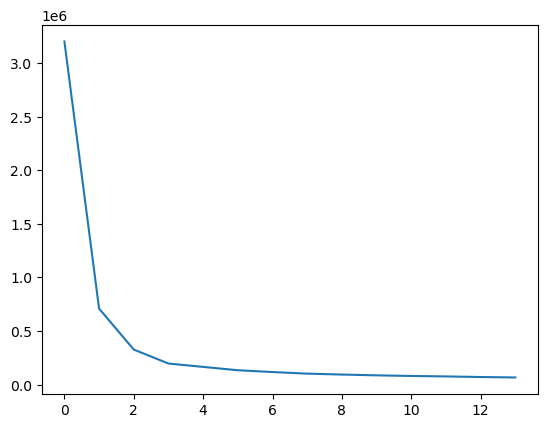

In [33]:
plt.plot(inertias)

In [188]:
from sklearn.cluster import KMeans

kmeans_pca = KMeans(n_clusters=6, random_state=0, n_init=5)
kmeans_pca.fit(pca_data)

KMeans(n_clusters=6, n_init=5, random_state=0)

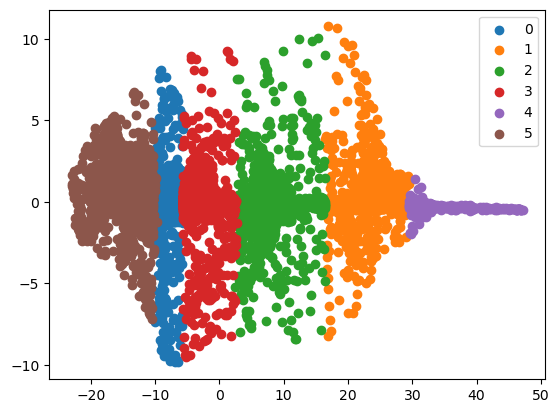

In [189]:
for i in range(kmeans_pca.n_clusters):
    xs = pca_data[kmeans_pca.labels_ == i]
    plt.scatter(xs[:,0], xs[:,1], label=i)
    
plt.legend()

In [190]:
for i, (index, row) in enumerate(df.iterrows()):
    mm['labels'].loc[dict(latitude=index[0], longitude=index[1])] = kmeans_pca.labels_[i]

C:\Users\cristhianroman\AppData\Local\Temp\ipykernel_3600\1763849249.py:23: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap))


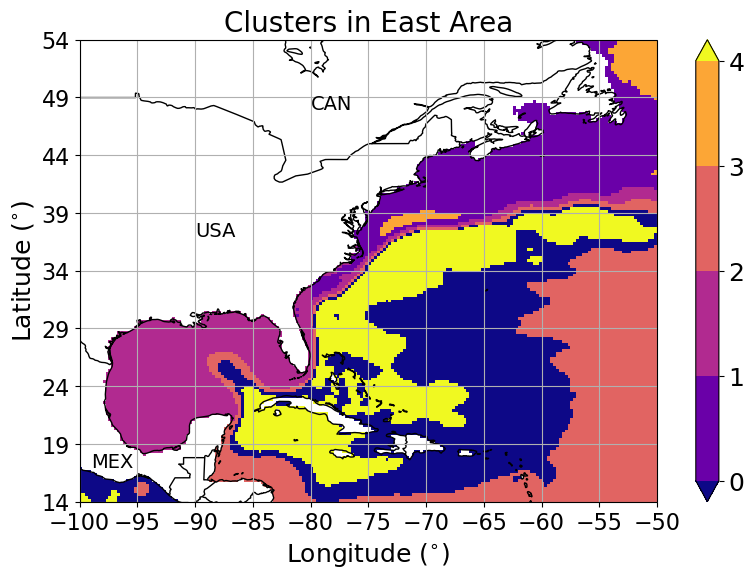

In [191]:
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cfeature.BORDERS)  # Add country borders for better referenc

# plt.pcolormesh(mm.longitude, mm.latitude, kmeans_pca.labels_.reshape(20,16), transform=ccrs.PlateCarree())
# cmap = plt.cm.get_cmap('Reds')
# cmap.set_under('w')
cmap = mpl.cm.plasma
bounds = range(kmeans_pca.n_clusters-1)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N, extend='both')


plt.pcolormesh(mm.longitude, mm.latitude, mm['labels'], transform=ccrs.PlateCarree(), cmap=cmap)
plt.xlim([-100, -50])
plt.xticks([-100, -95, -90, -85, -80, -75, -70, -65, -60, -55, -50], fontsize=16)
plt.xlabel(r'Longitude $(^{\circ}$)', fontsize=18)
plt.ylim([14, 54])
plt.yticks([14, 19, 24, 29, 34, 39, 44, 49, 54], fontsize=16)
plt.ylabel(r'Latitude $(^{\circ}$)', fontsize=18)
plt.title('Clusters in East Area', fontsize=20)
# cbar = plt.colorbar()
cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap))
# cbar = fig.colorbar(norm=norm, cmap=cmap)
cbar.ax.tick_params(labelsize=18)
# cbar.ax.set_yticklabels(['', '', '', '', ''], fontsize=18)

plt.text(-80, 48, 'CAN', fontsize=14)
plt.text(-90, 37, 'USA', fontsize=14)
plt.text(-99, 17, 'MEX', fontsize=14)
# plt.legend()

# plt.savefig("heatmap_adt.png", transparent=True, bbox_inches="tight", facecolor ='w', dpi=700)
plt.grid()
plt.show()

In [192]:
df_processed = df.T.reset_index().drop(columns=[('level_0',''), ('time','')]).T
df_processed['label_pca'] = kmeans_pca.labels_
df_processed = df_processed.set_index('label_pca')
df_processed = df_processed.stack()
df_processed = df_processed.reset_index().drop(columns=['level_1'])
df_processed.groupby(by='label_pca').aggregate(['mean', 'std', 'median'])

0                    
               mean       std    median
label_pca                              
0          0.728965  0.109498  0.728064
1         -0.028375  0.129939 -0.041775
2          0.343121  0.155339  0.336961
3          0.618602  0.113704  0.619211
4         -0.266827  0.135130 -0.241663
5          0.838783  0.144902  0.831838

# Select coast

In [193]:
df_coast = df.T.reset_index().drop(columns=[('level_0',''), ('time','')]).T
df_coast['label_pca'] = kmeans_pca.labels_
df_coast.head()

0         1         2         3         4  \
latitude longitude                                                     
14.125   -100.875   0.819198  0.815945  0.813294  0.811217  0.809685   
         -100.625   0.818592  0.816840  0.815524  0.814623  0.814116   
         -100.375   0.819780  0.819958  0.820332  0.820891  0.821626   
         -100.125   0.821921  0.823922  0.825838  0.827673  0.829432   
         -99.875    0.827892  0.831067  0.833876  0.836344  0.838494   

                           5         6         7         8         9  ...  \
latitude longitude                                                    ...   
14.125   -100.875   0.808672  0.808148  0.808087  0.808459  0.809236  ...   
         -100.625   0.813982  0.814200  0.814748  0.815606  0.816753  ...   
         -100.375   0.822527  0.823584  0.824786  0.826124  0.827587  ...   
         -100.125   0.831122  0.832746  0.834310  0.835820  0.837280  ...   
         -99.875    0.840348  0.841930  0.843263  0.844369  0.845273  ...   

                        1818      1819      1820      1821      1822  \
latitude longitude                                                     
14.125   -100.875   0.764769  0.764982  0.765688  0.766924  0.768726   
         -100.625   0.754794  0.757372  0.760688  0.764785  0.769709   
         -100.375   0.753530  0.758665  0.764724  0.771754  0.779802   
         -100.125   0.760774  0.767675  0.775476  0.784214  0.793926   
         -99.875    0.772222  0.779689  0.787819  0.796628  0.806128   

                        1823      1824      1825      1826  label_pca  
latitude longitude                                                     
14.125   -100.875   0.771130  0.774172  0.777888  0.782314          5  
         -100.625   0.775504  0.782215  0.789887  0.798565          5  
         -100.375   0.788918  0.799148  0.810542  0.823148          5  
         -100.125   0.804650  0.816424  0.829285  0.843271          5  
         -99.875    0.816333  0.827258  0.838914  0.851318          5  

[5 rows x 1828 columns]

In [194]:
# select cluster 1, 3, 5
df_coast = df_coast[df_coast.label_pca.isin([1, 2, 4])]
df_coast.drop(columns=['label_pca'], inplace=True)
df_coast.head()

0         1         2         3         4     \
latitude longitude                                                     
18.125   -94.375    0.152652  0.149541  0.146933  0.144796  0.143099   
18.375   -94.625    0.161915  0.155934  0.150849  0.146605  0.143147   
         -94.375    0.162670  0.159051  0.155976  0.153411  0.151318   
         -94.125    0.176598  0.174891  0.173468  0.172307  0.171388   
         -93.875    0.192656  0.191806  0.191157  0.190695  0.190405   

                        5         6         7         8         9     ...  \
latitude longitude                                                    ...   
18.125   -94.375    0.141808  0.140893  0.140321  0.140060  0.140079  ...   
18.375   -94.625    0.140419  0.138366  0.136934  0.136066  0.135709  ...   
         -94.375    0.149665  0.148414  0.147531  0.146980  0.146726  ...   
         -94.125    0.170692  0.170200  0.169890  0.169743  0.169740  ...   
         -93.875    0.190275  0.190288  0.190432  0.190692  0.191054  ...   

                        1817      1818      1819      1820      1821  \
latitude longitude                                                     
18.125   -94.375    0.282460  0.286311  0.290346  0.294569  0.298986   
18.375   -94.625    0.284000  0.286788  0.289723  0.292808  0.296044   
         -94.375    0.295913  0.300376  0.305130  0.310186  0.315552   
         -94.125    0.317905  0.323114  0.328707  0.334698  0.341103   
         -93.875    0.334523  0.339588  0.345077  0.351008  0.357396   

                        1822      1823      1824      1825      1826  
latitude longitude                                                    
18.125   -94.375    0.303600  0.308418  0.313443  0.318682  0.324138  
18.375   -94.625    0.299437  0.302987  0.306700  0.310576  0.314621  
         -94.375    0.321238  0.327252  0.333605  0.340304  0.347359  
         -94.125    0.347936  0.355211  0.362943  0.371147  0.379837  
         -93.875    0.364258  0.371611  0.379471  0.387855  0.396780  

[5 rows x 1827 columns]

In [195]:
pca = PCA(n_components=3)
pca_data = pca.fit_transform(df_coast)

In [196]:
pca.explained_variance_ratio_.sum()

0.8182815004216929

In [172]:
from sklearn.cluster import KMeans

inertias = []
for i in range(1, 15):
    kmeans_pca = KMeans(n_clusters=i, random_state=0, n_init=5)
    kmeans_pca.fit(pca_data)
    
    inertias.append(kmeans_pca.inertia_)

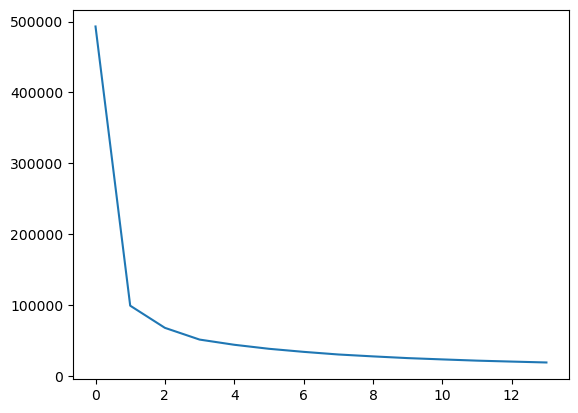

In [65]:
plt.plot(inertias)

In [197]:
from sklearn.cluster import KMeans

kmeans_pca = KMeans(n_clusters=7, random_state=0, n_init=5)
kmeans_pca.fit(pca_data)

KMeans(n_clusters=7, n_init=5, random_state=0)

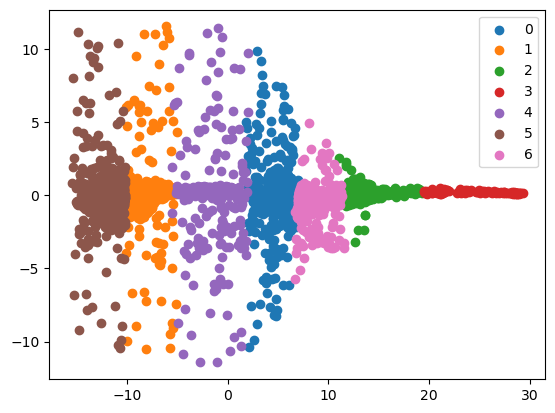

In [198]:
for i in range(kmeans_pca.n_clusters):
    xs = pca_data[kmeans_pca.labels_ == i]
    plt.scatter(xs[:,0], xs[:,1], label=i)
    
plt.legend()

In [199]:
labels = np.empty((160, 204))
labels[:] = np.nan
mm['labels'] = (('latitude', 'longitude'), labels)

In [200]:
for i, (index, row) in enumerate(df_coast.iterrows()):
    mm['labels'].loc[dict(latitude=index[0], longitude=index[1])] = kmeans_pca.labels_[i]

C:\Users\cristhianroman\AppData\Local\Temp\ipykernel_3600\167069037.py:23: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap))


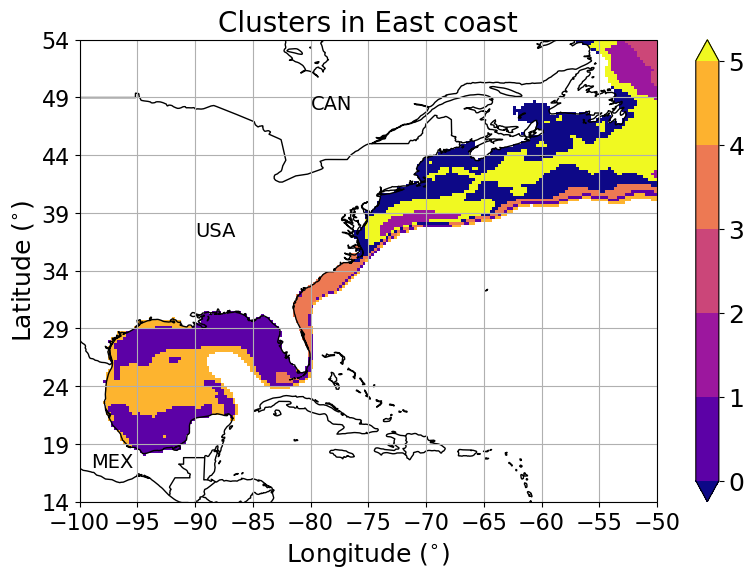

In [201]:
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cfeature.BORDERS)  # Add country borders for better referenc

# plt.pcolormesh(mm.longitude, mm.latitude, kmeans_pca.labels_.reshape(20,16), transform=ccrs.PlateCarree())
# cmap = plt.cm.get_cmap('Reds')
# cmap.set_under('w')
cmap = mpl.cm.plasma
bounds = range(kmeans_pca.n_clusters-1)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N, extend='both')


plt.pcolormesh(mm.longitude, mm.latitude, mm['labels'], transform=ccrs.PlateCarree(), cmap=cmap)
plt.xlim([-100, -50])
plt.xticks([-100, -95, -90, -85, -80, -75, -70, -65, -60, -55, -50], fontsize=16)
plt.xlabel(r'Longitude $(^{\circ}$)', fontsize=18)
plt.ylim([14, 54])
plt.yticks([14, 19, 24, 29, 34, 39, 44, 49, 54], fontsize=16)
plt.ylabel(r'Latitude $(^{\circ}$)', fontsize=18)
plt.title('Mean', fontsize=20)
# cbar = plt.colorbar()
cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap))
cbar.ax.tick_params(labelsize=18)
# cbar.ax.set_yticklabels(['-0.6', '0', '0.6', '1.0'], fontsize=18)
plt.title('Clusters in East coast', fontsize=20)

plt.text(-80, 48, 'CAN', fontsize=14)
plt.text(-90, 37, 'USA', fontsize=14)
plt.text(-99, 17, 'MEX', fontsize=14)

# plt.savefig("heatmap_adt.png", transparent=True, bbox_inches="tight", facecolor ='w', dpi=700)
plt.grid()
plt.show()

# Umap

In [26]:
import umap

In [27]:
fit = umap.UMAP(n_components=5, min_dist=0.3, n_neighbors=5, n_jobs=1)

In [28]:
umap_data = fit.fit_transform(df)

In [29]:
from sklearn.cluster import KMeans

kmeans_umap = KMeans(n_clusters=10, random_state=0, n_init=5)
kmeans_umap.fit(umap_data)

KMeans(n_clusters=10, n_init=5, random_state=0)

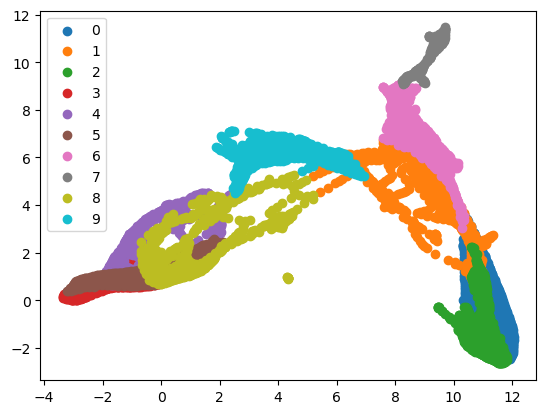

In [30]:
for i in range(kmeans_umap.n_clusters):
    xs = umap_data[kmeans_umap.labels_ == i]
    plt.scatter(xs[:,0], xs[:,1], label=i)
    
plt.legend()

In [31]:
for i, (index, row) in enumerate(df.iterrows()):
    mm['labels'].loc[dict(latitude=index[0], longitude=index[1])] = kmeans_umap.labels_[i]

C:\Users\cristhianroman\AppData\Local\Temp\ipykernel_14688\1433703600.py:23: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap))


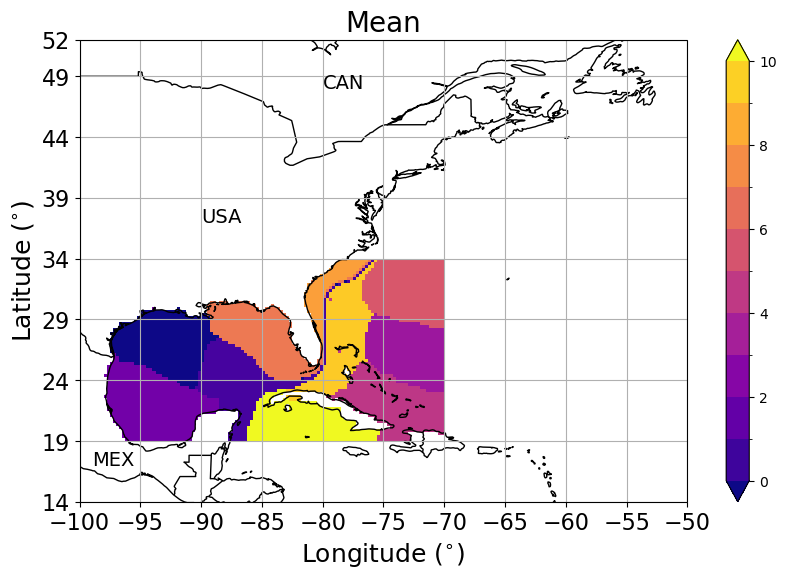

In [32]:
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cfeature.BORDERS)  # Add country borders for better referenc

# plt.pcolormesh(mm.longitude, mm.latitude, kmeans_pca.labels_.reshape(20,16), transform=ccrs.PlateCarree())
# cmap = plt.cm.get_cmap('Reds')
# cmap.set_under('w')
cmap = mpl.cm.plasma
bounds = range(11)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N, extend='both')


plt.pcolormesh(mm.longitude, mm.latitude, mm['labels'], transform=ccrs.PlateCarree(), cmap=cmap)
plt.xlim([-100, -50])
plt.xticks([-100, -95, -90, -85, -80, -75, -70, -65, -60, -55, -50], fontsize=16)
plt.xlabel(r'Longitude $(^{\circ}$)', fontsize=18)
plt.ylim([14, 52])
plt.yticks([14, 19, 24, 29, 34, 39, 44, 49, 52], fontsize=16)
plt.ylabel(r'Latitude $(^{\circ}$)', fontsize=18)
plt.title('Mean', fontsize=20)
# cbar = plt.colorbar()
fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap))
# cbar.ax.set_yticklabels(['-0.6', '0', '0.6', '1.0'], fontsize=18)

plt.text(-80, 48, 'CAN', fontsize=14)
plt.text(-90, 37, 'USA', fontsize=14)
plt.text(-99, 17, 'MEX', fontsize=14)

# plt.savefig("heatmap_adt.png", transparent=True, bbox_inches="tight", facecolor ='w', dpi=700)
plt.grid()
plt.show()

In [33]:
df_processed = df.T.reset_index().drop(columns=[('level_0',''), ('time','')]).T
df_processed['label_umap'] = kmeans_umap.labels_
df_processed = df_processed.set_index('label_umap')
df_processed = df_processed.stack()
df_processed = df_processed.reset_index().drop(columns=['level_1'])
df_processed.groupby(by='label_umap').aggregate(['mean', 'std', 'median'])

0                    
                mean       std    median
label_umap                              
0           0.364119  0.124616  0.351159
1           0.537138  0.243265  0.475966
2           0.371166  0.090391  0.361532
3           0.792247  0.102582  0.787995
4           0.780192  0.064343  0.778596
5           0.793762  0.127371  0.787572
6           0.315652  0.117615  0.298454
7           0.168329  0.097801  0.154288
8           0.786914  0.110781  0.789279
9           0.837921  0.080998  0.832023

# tsne

In [34]:
from sklearn.manifold import TSNE

In [41]:
tsne_data = TSNE(n_components=3, learning_rate='auto', init='random', perplexity=15).fit_transform(df)

In [42]:
from sklearn.cluster import KMeans

kmeans_tsne = KMeans(n_clusters=10, random_state=0, n_init=5)
kmeans_tsne.fit(tsne_data)

KMeans(n_clusters=10, n_init=5, random_state=0)

In [43]:
tsne_data.shape

(5039, 3)

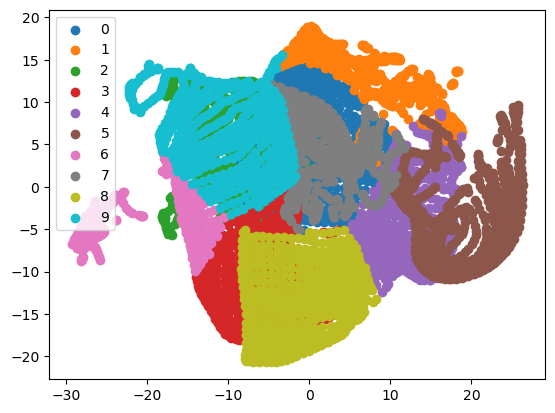

In [44]:
for i in range(kmeans_tsne.n_clusters):
    xs = tsne_data[kmeans_tsne.labels_ == i]
    plt.scatter(xs[:,0], xs[:,1], label=i)
    
plt.legend()

In [45]:
for i, (index, row) in enumerate(df.iterrows()):
    mm['labels'].loc[dict(latitude=index[0], longitude=index[1])] = kmeans_tsne.labels_[i]

C:\Users\cristhianroman\AppData\Local\Temp\ipykernel_14688\1433703600.py:23: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap))


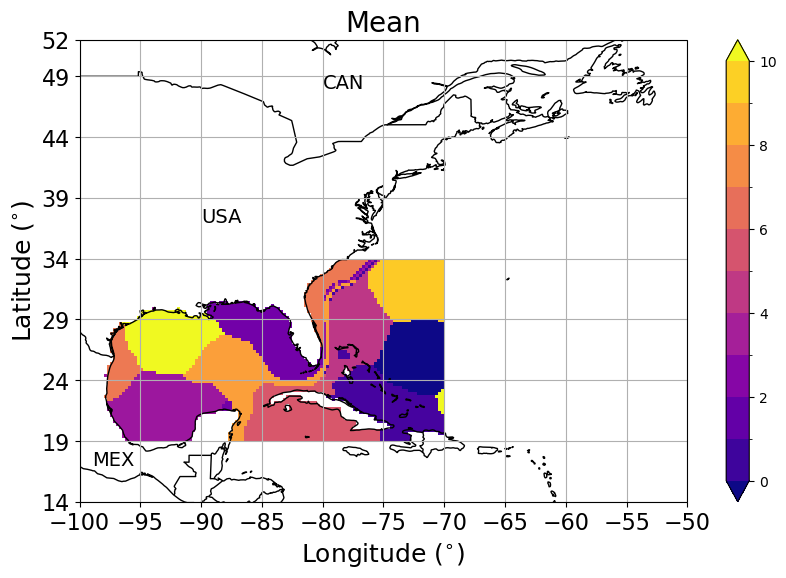

In [46]:
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cfeature.BORDERS)  # Add country borders for better referenc

# plt.pcolormesh(mm.longitude, mm.latitude, kmeans_pca.labels_.reshape(20,16), transform=ccrs.PlateCarree())
# cmap = plt.cm.get_cmap('Reds')
# cmap.set_under('w')
cmap = mpl.cm.plasma
bounds = range(11)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N, extend='both')


plt.pcolormesh(mm.longitude, mm.latitude, mm['labels'], transform=ccrs.PlateCarree(), cmap=cmap)
plt.xlim([-100, -50])
plt.xticks([-100, -95, -90, -85, -80, -75, -70, -65, -60, -55, -50], fontsize=16)
plt.xlabel(r'Longitude $(^{\circ}$)', fontsize=18)
plt.ylim([14, 52])
plt.yticks([14, 19, 24, 29, 34, 39, 44, 49, 52], fontsize=16)
plt.ylabel(r'Latitude $(^{\circ}$)', fontsize=18)
plt.title('Mean', fontsize=20)
# cbar = plt.colorbar()
fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap))
# cbar.ax.set_yticklabels(['-0.6', '0', '0.6', '1.0'], fontsize=18)

plt.text(-80, 48, 'CAN', fontsize=14)
plt.text(-90, 37, 'USA', fontsize=14)
plt.text(-99, 17, 'MEX', fontsize=14)

# plt.savefig("heatmap_adt.png", transparent=True, bbox_inches="tight", facecolor ='w', dpi=700)
plt.grid()
plt.show()